# Logistic Regression

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
# Set a numpy seed for reproducibility
np.random.seed(0)

# Generate random student scores for 100 students
scores = np.random.randint(0, 101, 100)

# Create a dataframe containing the scores
df = pd.DataFrame({'Score' : scores})

# Create a pass column containing categorical labels based on the score column
df['Pass'] = np.where(df['Score'] >= 50, 'Yes', 'No')

# Display the first five entries
display(df.head())

,Score,Pass
0,44,No
1,47,No
2,64,Yes
3,67,Yes
4,67,Yes


In [9]:
# Convert categorical data to binary values
df['Pass'] = (df['Pass'] == 'Yes').astype(int)

# Display new dataframe
display(df.head())

,Score,Pass
0,44,0
1,47,0
2,64,1
3,67,1
4,67,1


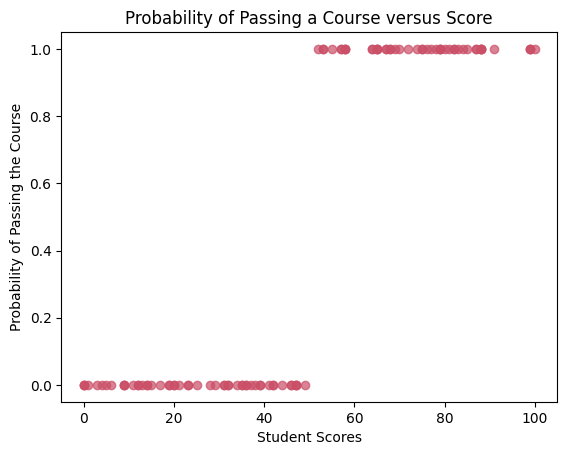

In [12]:
# Define X data
X = df[['Score']]

# Define Y Data
Y = df[['Pass']]

# Plot the data
plt.plot(X, Y, 'o', color='#CA4F67', alpha=0.7)
plt.title('Probability of Passing a Course versus Score')
plt.xlabel('Student Scores')
plt.ylabel('Probability of Passing the Course')
plt.show()

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Create a logistic regression object
logistic_regression = LogisticRegression()

# Pass the data through the model
logistic_regression.fit(X_train, y_train)

C:\Users\drarm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
# Make predictions
y_predicted = logistic_regression.predict(X_test)

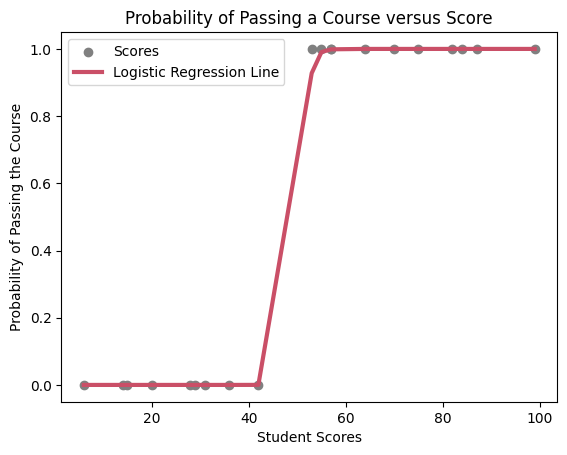

In [25]:
# Get probabilities
y_probability = logistic_regression.predict_proba(X_test)[:, 1]

# Plot the results
plt.scatter(X_test, y_test, color='gray', label='Scores')
plt.plot(np.sort(X_test.values.ravel()), np.sort(y_probability), color='#CA4F67', linewidth=3, linestyle='-', label="Logistic Regression Line")
plt.legend()
plt.title('Probability of Passing a Course versus Score')
plt.xlabel('Student Scores')
plt.ylabel('Probability of Passing the Course')
plt.show()

In [21]:
# Display model accuracy
display(f'Model Accuracy: {metrics.accuracy_score(y_test, y_predicted) * 100}%')

'Model Accuracy: 100.0%'